# 1. Exploratory Data Analysis (EDA):

In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Load the Dataset from Excel
# Assuming the Excel file is named 'glass_data.xlsx' and is in the current directory
file_path = "D:\Assignments Data Science ExcelR\Random Forest\Random Forest\glass.xlsx"
sheet_name = 'glass'  # Specify the sheet name
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

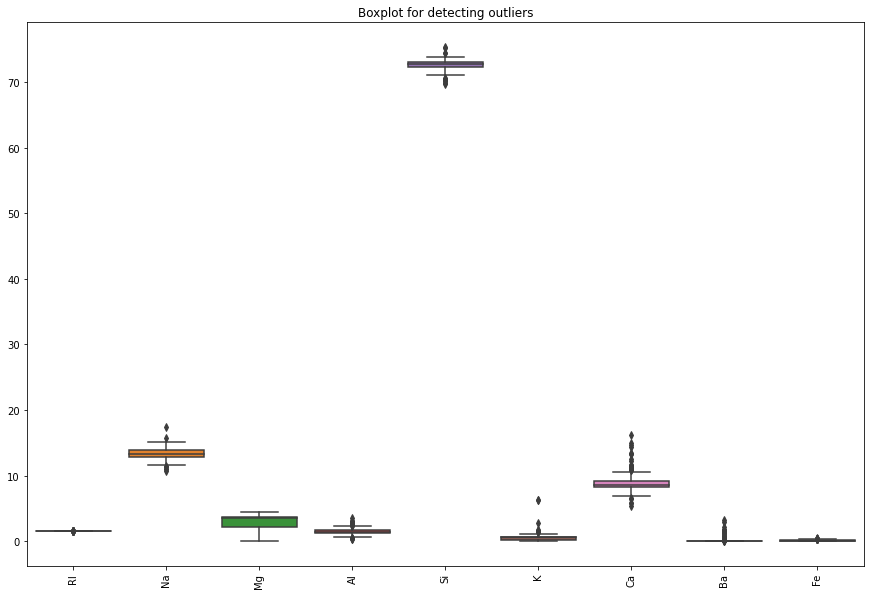

In [9]:
# Step 5: Check for Outliers and Inconsistencies
# Using boxplots to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop('Type', axis=1))
plt.title('Boxplot for detecting outliers')
plt.xticks(rotation=90)
plt.show()

# 2: Data Visualization:

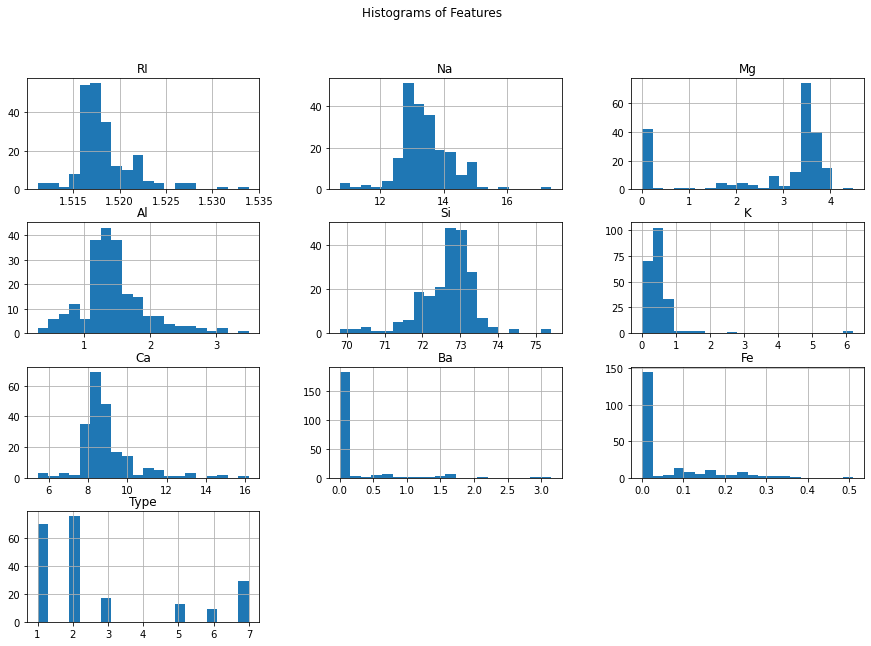

In [11]:
# Histograms
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

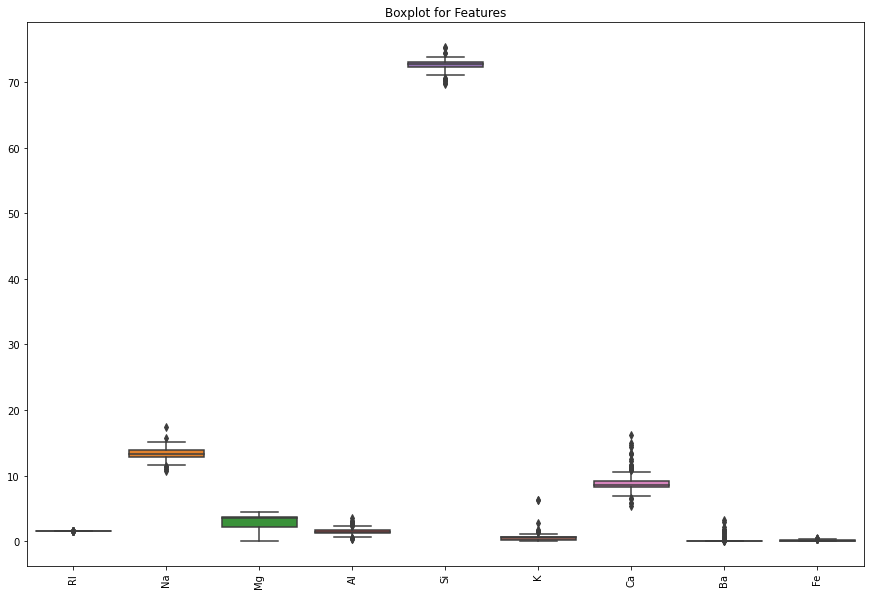

In [12]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop('Type', axis=1))
plt.title('Boxplot for Features')
plt.xticks(rotation=90)
plt.show()

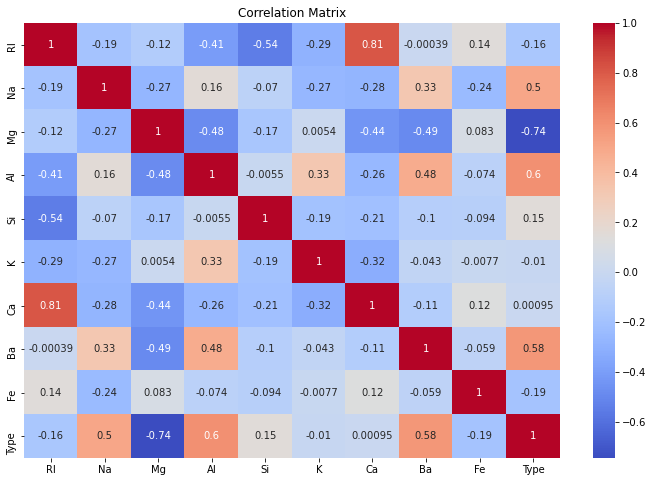

In [14]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3: Data Preprocessing:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample


In [16]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

 Since there are no missing values in this dataset, we proceed to the next steps.


Step 2: Encoding Categorical Variables

The 'Type' column is already numerical, so no encoding is needed.

In [19]:
# Step 3: Feature Scaling
# Separate features and target variable
X = data.drop('Type', axis=1)
y = data['Type']

In [20]:
# Apply Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Step 4: Handle Imbalanced Data
# Check for imbalance in the target variable
print("\nClass distribution before handling imbalance:")
print(y.value_counts())


Class distribution before handling imbalance:
2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [22]:
# Combine the features and target for resampling
data_resampled = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

In [23]:
# Separate majority and minority classes
class_counts = y.value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts < class_counts.max()].index.tolist()

In [24]:
# Upsample minority classes
upsampled = []
for class_ in minority_classes:
    class_data = data_resampled[data_resampled['Type'] == class_]
    upsampled_class_data = resample(class_data,
                                    replace=True,  # Sample with replacement
                                    n_samples=class_counts.max(),  # Match number of majority class
                                    random_state=42)  # Reproducible results
    upsampled.append(upsampled_class_data)

In [25]:
# Combine majority class with upsampled minority classes
majority_class_data = data_resampled[data_resampled['Type'] == majority_class]
upsampled_data = pd.concat([majority_class_data] + upsampled)

In [26]:
# Separate features and target variable again after resampling
X_resampled = upsampled_data.drop('Type', axis=1)
y_resampled = upsampled_data['Type']

In [27]:
# Check class distribution after handling imbalance
print("\nClass distribution after handling imbalance:")
print(y_resampled.value_counts())


Class distribution after handling imbalance:
1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64


In [28]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Data preprocessing complete. Ready for model training.

# 4: Random Forest Model Implementation:

In [30]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [31]:
# Step 1: Data splitting was already done in preprocessing
# X_train, X_test, y_train, y_test

In [32]:
# Step 2: Implementing the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [33]:
# Step 3: Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
# Step 4: Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [35]:
# Step 5: Evaluate performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [36]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9021739130434783
Precision: 0.9210861602165951
Recall: 0.9021739130434783
F1-score: 0.9026170277230723


In [37]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       1.00      0.75      0.86        20
           3       0.67      1.00      0.80        12
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        14

    accuracy                           0.90        92
   macro avg       0.91      0.91      0.90        92
weighted avg       0.92      0.90      0.90        92



In [38]:
# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[11  0  4  0  0  0]
 [ 2 15  2  0  1  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 14]]


# 5: Bagging and Boosting Methods

In [39]:
# Import necessary libraries for Bagging and Boosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier


In [40]:
# Step 1: Apply Bagging
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [41]:
# Evaluate Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')


In [42]:
print("Bagging Model Performance:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-score:", f1_bagging)
print("\nClassification Report for Bagging:\n", classification_report(y_test, y_pred_bagging))
print("Confusion Matrix for Bagging:\n", confusion_matrix(y_test, y_pred_bagging))

Bagging Model Performance:
Accuracy: 0.9021739130434783
Precision: 0.9210861602165951
Recall: 0.9021739130434783
F1-score: 0.9026170277230723

Classification Report for Bagging:
               precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       1.00      0.75      0.86        20
           3       0.67      1.00      0.80        12
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        14

    accuracy                           0.90        92
   macro avg       0.91      0.91      0.90        92
weighted avg       0.92      0.90      0.90        92

Confusion Matrix for Bagging:
 [[11  0  4  0  0  0]
 [ 2 15  2  0  1  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 14]]


In [43]:
# Step 2: Apply Boosting
boosting_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                    n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

C:\Users\PRAPANJ K M\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [44]:
# Evaluate Boosting model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')


In [45]:
print("\nBoosting Model Performance:")
print("Accuracy:", accuracy_boosting)
print("Precision:", precision_boosting)
print("Recall:", recall_boosting)
print("F1-score:", f1_boosting)
print("\nClassification Report for Boosting:\n", classification_report(y_test, y_pred_boosting))
print("Confusion Matrix for Boosting:\n", confusion_matrix(y_test, y_pred_boosting))



Boosting Model Performance:
Accuracy: 0.8913043478260869
Precision: 0.9074992036948559
Recall: 0.8913043478260869
F1-score: 0.8918049734327572

Classification Report for Boosting:
               precision    recall  f1-score   support

           1       0.85      0.73      0.79        15
           2       0.94      0.75      0.83        20
           3       0.67      1.00      0.80        12
           5       1.00      1.00      1.00        11
           6       0.95      1.00      0.98        20
           7       1.00      0.93      0.96        14

    accuracy                           0.89        92
   macro avg       0.90      0.90      0.89        92
weighted avg       0.91      0.89      0.89        92

Confusion Matrix for Boosting:
 [[11  0  4  0  0  0]
 [ 2 15  2  0  1  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 11  0  0]
 [ 0  0  0  0 20  0]
 [ 0  1  0  0  0 13]]


In [46]:
# Step 3: Compare Results
print("\nComparison of Bagging and Boosting Models:")
print(f"{'Metric':<15} {'Bagging':<15} {'Boosting'}")
print(f"{'Accuracy':<15} {accuracy_bagging:<15.4f} {accuracy_boosting:.4f}")
print(f"{'Precision':<15} {precision_bagging:<15.4f} {precision_boosting:.4f}")
print(f"{'Recall':<15} {recall_bagging:<15.4f} {recall_boosting:.4f}")
print(f"{'F1-score':<15} {f1_bagging:<15.4f} {f1_boosting:.4f}")


Comparison of Bagging and Boosting Models:
Metric          Bagging         Boosting
Accuracy        0.9022          0.8913
Precision       0.9211          0.9075
Recall          0.9022          0.8913
F1-score        0.9026          0.8918


# Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.


Bagging (Bootstrap Aggregating)

Bagging is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms. It reduces variance and helps to avoid overfitting. The key steps in bagging are:

1. Bootstrap Sampling: Multiple subsets of the training data are created by random sampling with replacement.
2. Training Multiple Models: A base learner (e.g., a decision tree) is trained on each subset independently.
3. Aggregating Predictions: The predictions from each model are combined to form the final output. For classification, a majority vote is typically used, while for regression, the average prediction is taken.

Boosting

Boosting is another ensemble technique that combines the predictions of several base estimators to improve robustness. Unlike bagging, boosting focuses on reducing bias. The key steps in boosting are:

1. Sequential Training: Base learners are trained sequentially, with each model attempting to correct the errors of its predecessor.
2. Weight Adjustment: Each observation's weight is adjusted based on the previous prediction errors, giving more importance to misclassified samples.
3. Combining Models: The final model is a weighted sum of all the base learners, where each learner's weight is proportional to its accuracy.

Differences Between Bagging and Boosting:

1. Training Process:

Bagging: Models are trained independently and in parallel.
Boosting: Models are trained sequentially, with each model focusing on the errors of the previous one.
    
2. Error Handling:

Bagging: Aims to reduce variance by averaging multiple models.
Boosting: Aims to reduce bias by focusing on and correcting the errors of previous models.
    
3. Model Weighting:

Bagging: All models are given equal weight in the final prediction.
Boosting: Models are weighted based on their performance, with more accurate models given higher weights.
    
4. Overfitting:

Bagging: Generally reduces the risk of overfitting by averaging.
Boosting: Can be more prone to overfitting if not properly regularized.

.

.

2. Explain how to handle imbalance in the data. Explain within a paragraph.

Handling imbalanced data involves addressing the disproportionate representation of classes in a dataset to ensure that the machine learning model performs well across all classes. Common strategies include resampling techniques, such as oversampling the minority class to increase its representation (e.g., using SMOTE) or undersampling the majority class to reduce its dominance. Algorithmic approaches adjust class weights to give more importance to the minority class during model training. Additionally, ensemble methods like Balanced Random Forest or RUSBoost combine multiple models to better handle imbalances. Using appropriate evaluation metrics, such as precision, recall, and F1-score, helps in accurately assessing model performance in the presence of imbalanced classes. Combining these techniques can improve model robustness and generalization.